__Ejercicio 1:__. Implementar método implicito de Euler como quieran.

In [2]:
function eulerMethod(f,alfa,t0,h,N) #voy a implementar el metodo numerico de euler para ec. diferenciales
    T = [] #en estos arreglos vacios guardaré mis pasos de tiempo t
    W = []#aqui guardare los x obtenidos en cada iteracion
    t=t0 #es mi valor inicial de t
    w = alfa #es mi valor inicial de x
    while t<=N #si t aun no llega al valor que quiero que llegue, entra al ciclo
        push!(T,t) #guarda el valor de t en T
        push!(W,w) #guarda el valor de x en W
        s=f(t,w)#la ec diferencial de primer orden está igualada a una funcion f y aca se evalua nuestro valor anterior de t y x
        w = w + h*s #recalculamos x
        t=t+h #recalculamos t
    end  
    scatter(T,W,color="green") #graficamos t vs x
end

eulerMethod (generic function with 1 method)

In [3]:
function h(t,x) #En este ejemplo será el de la tarea pasada
    return -5*x
end

h (generic function with 1 method)

In [4]:
using PyPlot

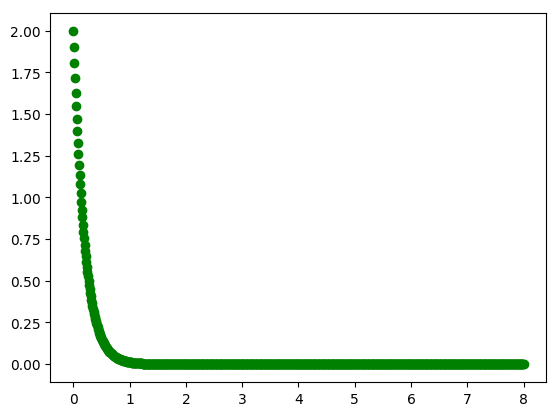

PyObject <matplotlib.collections.PathCollection object at 0x7fdcb5637090>

In [5]:
eulerMethod(h,2,0,0.01,8)

__Ejercicio 2:__ Implementar Euler: Regla del punto medio.

In [1]:
function EulerPuntoMedio(f,alfa,t0,h,N)
    X=[] #lo mismo que para EulerMethod
    T=[]
    x=alfa
    t=t0
    while t<=N
        push!(X,x)
        push!(T,t)
        a=f(t,x) #aca debo calcular el valor de esa f a la que esta igualada la ec evaluada en el valor anterior de x y t, pero a diferencia del otro método; aca no va a ir sumado directamente
        tt=t+(h/2) #recalculo una nueva t, tt que es el valor anterior de t mas la mitad del tamaño de paso
        xx=x+(h*a/2) #recalculo una nueva x,xx que es el valor de x mas el valor de a (f evaluado en x y t anteriores) por la mitad del tamaño de paso
        A=f(tt,xx) #A es la nueva evaluacion en f, pero ahora con los t y x ficticios; tt y xx
        x=x+(h*A) #ahora si para calcular la nueva x, tomo x anterior y la suma por la nueva evalucion de f por h
        t=t+h #voy dando pasos de tiempo
    end
    scatter(T,X,color="red") #grafico mi aproximacion de t vs x
end


EulerPuntoMedio (generic function with 1 method)

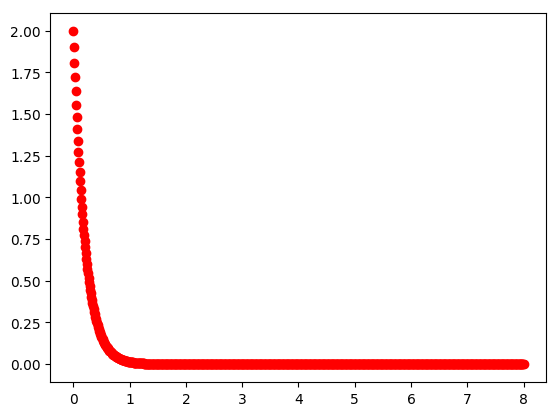

PyObject <matplotlib.collections.PathCollection object at 0x7fdcb54ce890>

In [6]:
EulerPuntoMedio(h,2,0,0.01,8)

__Ejercicio 3:__ Implementar método de Runge-Kutta de orden 4.

In [24]:
function MetodoRunge(f,alfa,t0,h,N) #función para la aproximación mediante el método runge de cuarto grado
    T = []
    X = []
    t = t0
    x = alfa
    while t<=N
        push!(T,t)
        push!(X,x)
        k1=(f(t,x)) #K1,k2,k3,k4 son las fórmulas para calcular las constantes para el método
        k2=(f(t+(h/2),x+(h*k1/2)))#runge de 4 grado.
        k3=f(t+(h/2),x+(h*k2/2))
        k4=f(t+h,x+(h*k3))
        t=t+h #son los pasos de tiempo y es válido ya que son constantes.
        x= x + (h/6)*(k1+(2(k2+k3))+k4) #Es según la fórmula, una aproximación del método de runge
    end
    scatter(T,X,color="brown") #grafico t vs x
end

MetodoRunge (generic function with 1 method)

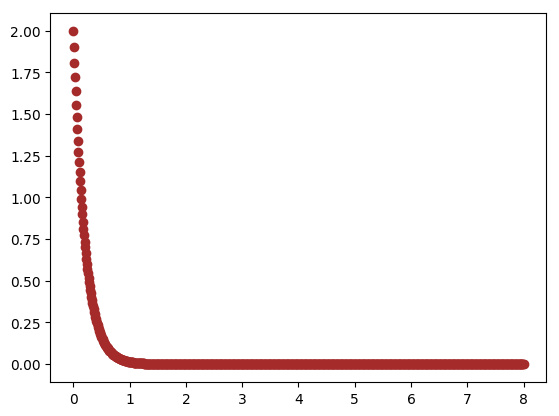

PyObject <matplotlib.collections.PathCollection object at 0x7fdcb534f610>

In [25]:
MetodoRunge(h,2,0,0.01,8)

In [44]:
function comparacion(f,alfa,t0,h,N)
    eulerMethod(f,alfa,t0,h,N)
    MetodoRunge(f,alfa,t0,h,N)
    EulerPuntoMedio(f,alfa,t0,h,N)
end
    
    

comparacion (generic function with 1 method)

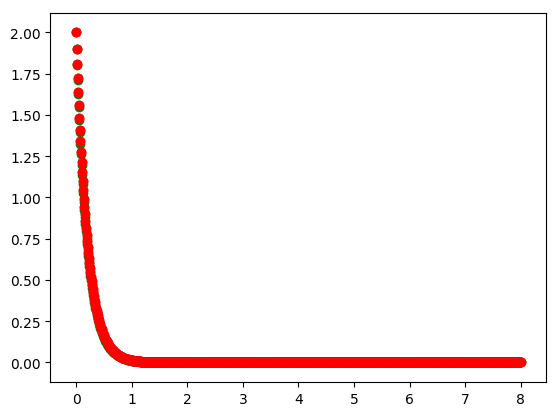

PyObject <matplotlib.collections.PathCollection object at 0x7fdcb52ac190>

In [27]:
comparacion(h,2,0,0.01,8)

Con fines de ver como se aproxima cada uno; lo voy a graficar con la solución para esta funcion específica para ver cual se acerca más y con h más pequeñas.

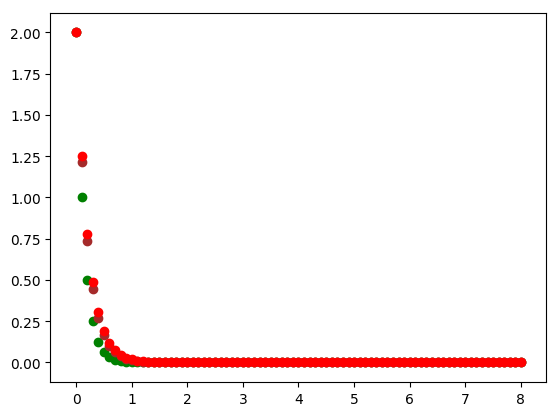

PyObject <matplotlib.collections.PathCollection object at 0x7fdcb5031790>

In [30]:
comparacion(h,2,0,0.1,8)

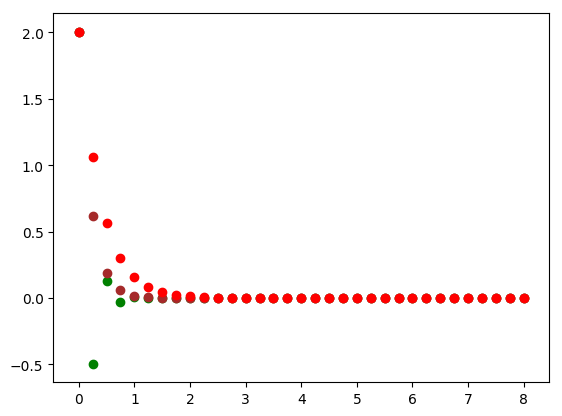

PyObject <matplotlib.collections.PathCollection object at 0x7fdcb4f03f50>

In [31]:
comparacion(h,2,0,0.25,8)

In [51]:
function comparacionconreal(alfa,t0,N,h) #aqui debo aclarar que es la grafica de t vs el valor de la solucion real de la f dada; en este caso el valor de f que propuse (funcion h), tiene la solucion alpha*e^(-5t) por eso puse esa función; pero en si es comparada con la solucion real de la ec dif
    T=[]
    X=[]
    t=t0
    x=alfa
    while t<=N
        push!(T,t)
        push!(X,x)
        t=t+h
        x=alfa*(exp(-5*t))
    end
    plot(T,X,color="gold")
end

comparacionconreal (generic function with 1 method)

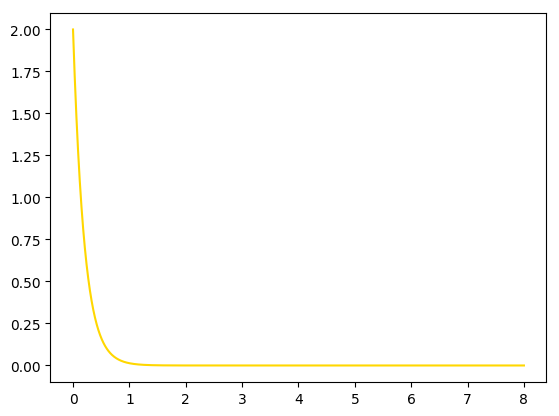

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fdcb4e4b250>

In [33]:
comparacionconreal(2,0,8,0.01)

In [34]:
function comp1(f,alfa,t0,h,N)
    eulerMethod(f,alfa,t0,h,N)
    comparacionconreal(alfa,t0,N,h)
end

comp1 (generic function with 1 method)

In [35]:
function comp2(f,alfa,t0,h,N)
    comparacionconreal(alfa,t0,N,h)
    EulerPuntoMedio(f,alfa,t0,h,N)
end

comp2 (generic function with 1 method)

In [36]:
function comp3(f,alfa,t0,h,N)
    comparacionconreal(alfa,t0,N,h)
   MetodoRunge(f,alfa,t0,h,N)
end

comp3 (generic function with 1 method)

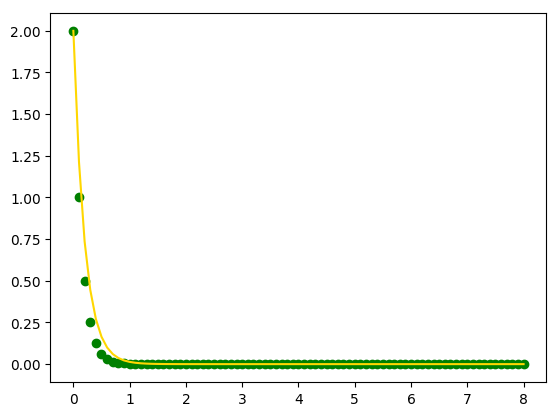

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fdcb4c31550>

In [39]:
comp1(h,2,0,0.1,8)

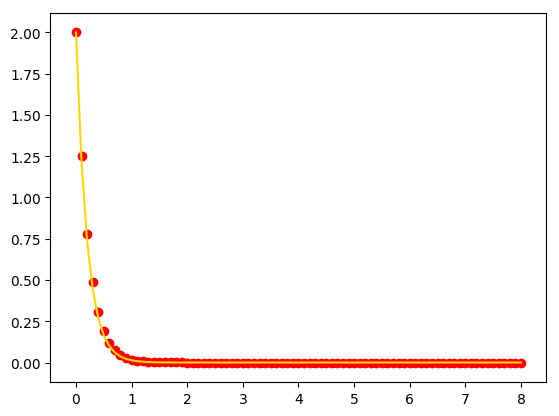

PyObject <matplotlib.collections.PathCollection object at 0x7fdcb4b78e50>

In [40]:
comp2(h,2,0,0.1,8)

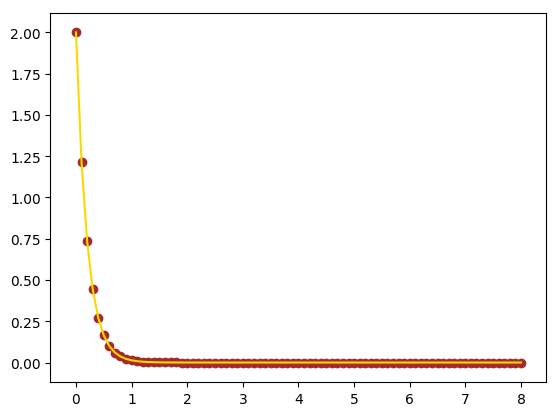

PyObject <matplotlib.collections.PathCollection object at 0x7fdcb4a57910>

In [41]:
comp3(h,2,0,0.1,8)

En mi consideración y despues de comparar los 3 métodos me parece que una mejor aproximación es la de Runge Kutta orden 4. Pero igual se podría programar una comparacion global para verlo mejor.

In [43]:
function comparacionglobal(f,alfa,t0,h,N)
    eulerMethod(f,alfa,t0,h,N)
    MetodoRunge(f,alfa,t0,h,N)
    EulerPuntoMedio(f,alfa,t0,h,N)
    comparacionconreal(alfa,t0,N,h)
end

comparacionglobal (generic function with 1 method)

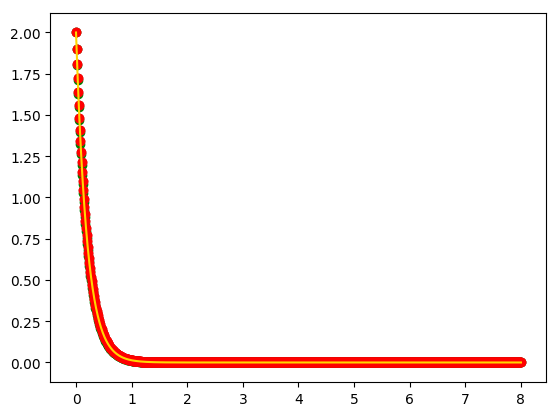

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fdcb49baa90>

In [45]:
comparacionglobal(h,2,0,0.01,8)

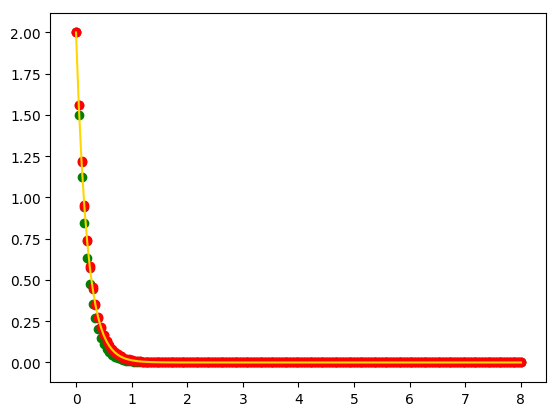

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fdcb4899990>

In [46]:
comparacionglobal(h,2,0,0.05,8)

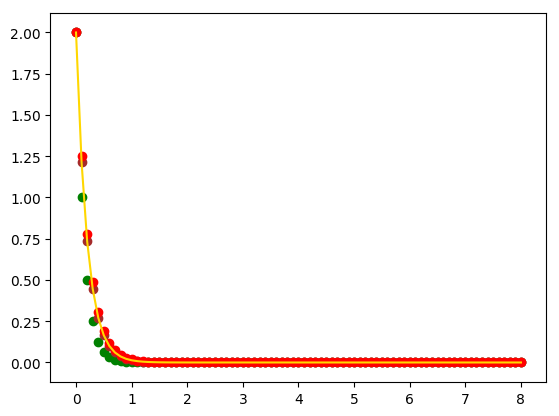

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fdcb47f6890>

In [47]:
comparacionglobal(h,2,0,0.1,8)

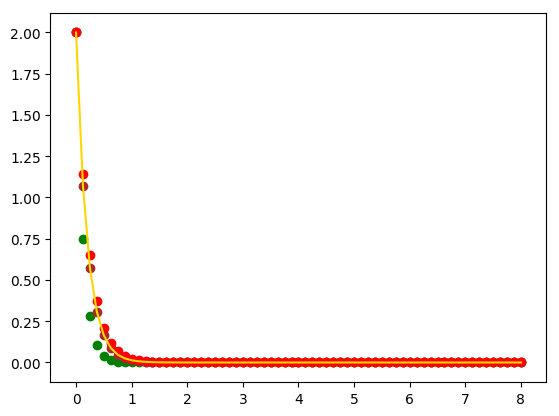

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fdcb46caf90>

In [48]:
comparacionglobal(h,2,0,0.125,8)

Aqui ya es claro que la mejor aproximación es con RungeKutta y que si tenemos h suficientemente pequeñas; parece que todos se aproximan igual; pero RK es mejor porque con h más grandes (menos iteraciones) se tienen mejores aproximaciones.

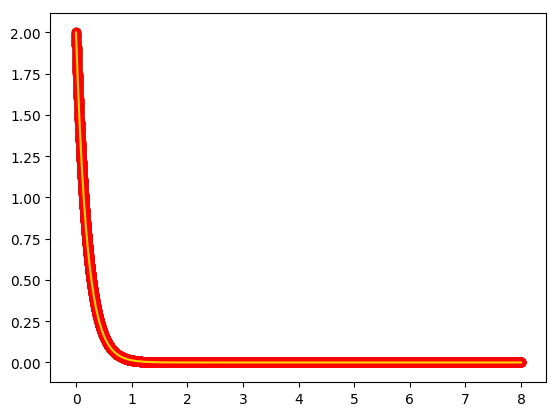

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fdcb462be50>

In [49]:
comparacionglobal(h,2,0,0.001,8)

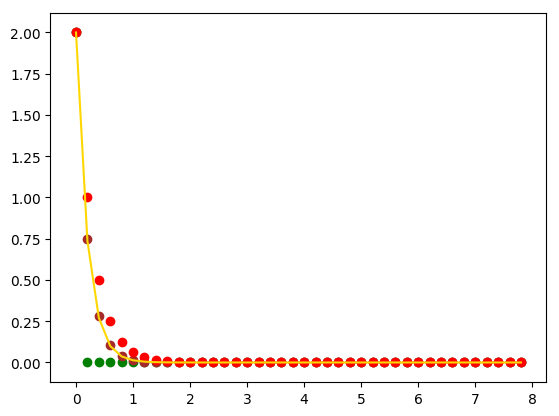

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fdcb457ac90>

In [50]:
comparacionglobal(h,2,0,0.2,8)